In [1]:
import soundfile as sf # flac file
import pandas as pd
import numpy as np

In [2]:
df = []
with open('./LibriSpeech/SPEAKERS.TXT') as f:
    for line in f:
        if line[0]!=';':
            df.append(list(map(str.strip, line.split('|'))))


In [3]:
import csv
data = pd.DataFrame(df)
data = data.drop([5,6],axis=1)
data.columns = ['id','sex','subset','minutes','name']
data = data[(data['subset']=='test-clean') | (data['subset']=='dev-clean')]
data.head()

,id,sex,subset,minutes,name
33,61,M,test-clean,8.08,Paul-Gabriel Wiener
46,84,F,dev-clean,8.02,Christie Nowak
70,121,F,test-clean,8.01,Nikolle Doolin
93,174,M,dev-clean,8.04,Peter Eastman
125,237,F,test-clean,8.02,rachelellen


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


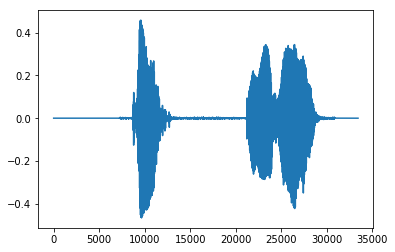

In [11]:
path = './LibriSpeech/dev-clean/84/121123/84-121123-0000.flac'

data, samplerate = sf.read(path) 
dataset = [data, data]

y_train = to_categorical([0,1], num_classes=2)
x_train = np.array(dataset)
import matplotlib.pyplot as plt
plt.plot(data)
plt.show()

In [6]:
model = Sequential()                                                        
model.add(Dense(32, activation='relu', input_shape=x_train[0].shape))       
model.add(Dense(2, activation='softmax'))                                   
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
2/2 [==============================] - 0s - loss: 0.6940 - acc: 0.5000
Epoch 2/10
2/2 [==============================] - 0s - loss: 4.1663 - acc: 0.5000
Epoch 3/10
2/2 [==============================] - 0s - loss: 0.7044 - acc: 0.5000
Epoch 4/10
2/2 [==============================] - 0s - loss: 0.6931 - acc: 0.5000
Epoch 5/10
2/2 [==============================] - 0s - loss: 0.6931 - acc: 0.5000
Epoch 6/10
2/2 [==============================] - 0s - loss: 0.6931 - acc: 0.5000
Epoch 7/10
2/2 [==============================] - 0s - loss: 0.6931 - acc: 0.5000
Epoch 8/10
2/2 [==============================] - 0s - loss: 0.6931 - acc: 0.5000
Epoch 9/10
2/2 [==============================] - 0s - loss: 0.6931 - acc: 0.5000
Epoch 10/10
2/2 [==============================] - 0s - loss: 0.6931 